In [1]:
from Parameters import Parameters, Data
from DataTypeBridges import Pycro
import os

DEBUG:matplotlib:matplotlib data path: c:\Users\Jack\Documents\GitHub\AngelFISH\.venv\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Jack\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Jack\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Jack\.matplotlib\fontlist-v390.json
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7


In [2]:
params = Parameters()
data = Data('Test_Steps')

In [3]:
step = Pycro()

In [4]:
params.load_in_mask = True
params.local_dataset_location =  [os.path.join(os.getcwd(), '..', r'dataBases\JF001_0min_5uM_12')]
params.initial_data_location = None
params.independent_params = {}

In [5]:
output = step.main(**params.__dict__)

Dataset opened                


In [6]:
output['images'][0,0,0,0,0,0].compute()

1344

In [7]:
data.append(output)

In [8]:
print(data)

Data(zarr_path=Test_Steps, loaded=True, dataset_keys=['image_locations', 'images', 'independent_params', 'mask_locations', 'masks', 'position_indexs'])


In [9]:
data.images.mean().compute()

3441.1912926261025

In [10]:
data.images[0, 0, 0, 0]

dask.array<getitem, shape=(1024, 1024), dtype=uint16, chunksize=(512, 512), chunktype=numpy.ndarray>

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Jack\\Documents\\GitHub\\AngelFISH\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c

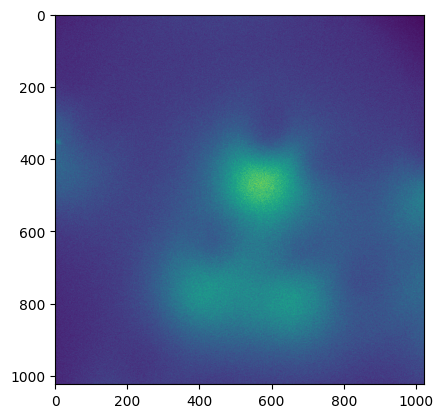

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data.images[0, 0, 1, 10])

In [12]:
import zarr
from joblib import Parallel, delayed


# Define a function to compute the mean of a single image
def compute_mean(image):
    return image.mean()

# Use joblib to parallelize the computation of means across images
image_means = Parallel(n_jobs=-1)(
    delayed(compute_mean)(data.images[i].compute()) for i in range(data.images.shape[0])
)

print(len(image_means))

73


In [13]:
image_means

[2487.0313632904536,
 2439.193694114685,
 2865.398925478496,
 3574.878245141771,
 4236.918739333985,
 4543.238752425663,
 2654.576863924662,
 2278.665638333275,
 3394.3732811004397,
 3649.5967601745847,
 3575.6580555174087,
 2534.806409336272,
 3491.557943344116,
 3924.3119986549254,
 3983.4742241814024,
 2985.6223342078074,
 2934.496597638206,
 3388.832461069501,
 2926.426536832537,
 3656.774319845533,
 2783.3570950523253,
 2811.1031164139035,
 3669.6614631168427,
 2806.2687491916477,
 2876.139899889628,
 3229.6127212312485,
 3481.33797840845,
 3446.953055684529,
 3688.1229726851934,
 4770.231963414994,
 3210.6080923685954,
 5613.799460910615,
 3765.5592998020234,
 3329.125492383563,
 2595.3212042308987,
 3340.4056379984295,
 2943.6890371110703,
 3138.477585429237,
 1929.746992550199,
 2531.0379495317975,
 3687.38391356998,
 2745.5300159908475,
 2775.751460226755,
 2981.3449457410784,
 3261.0735718863352,
 4064.139665527949,
 3656.8564457817683,
 2972.8479922309753,
 2511.626368976774

In [14]:
import dask.array as da

# Convert the image_means list to a Dask array
daImages = data.images
means = daImages.mean(axis=(1, 2, 3, 4, 5)).compute()
print(means.shape)

(73,)


In [15]:
daImages

dask.array<array, shape=(73, 1, 3, 21, 1024, 1024), dtype=uint16, chunksize=(10, 1, 2, 6, 512, 512), chunktype=numpy.ndarray>

In [16]:
means

array([2487.03136329, 2439.19369411, 2865.39892548, 3574.87824514,
       4236.91873933, 4543.23875243, 2654.57686392, 2278.66563833,
       3394.3732811 , 3649.59676017, 3575.65805552, 2534.80640934,
       3491.55794334, 3924.31199865, 3983.47422418, 2985.62233421,
       2934.49659764, 3388.83246107, 2926.42653683, 3656.77431985,
       2783.35709505, 2811.10311641, 3669.66146312, 2806.26874919,
       2876.13989989, 3229.61272123, 3481.33797841, 3446.95305568,
       3688.12297269, 4770.23196341, 3210.60809237, 5613.79946091,
       3765.5592998 , 3329.12549238, 2595.32120423, 3340.405638  ,
       2943.68903711, 3138.47758543, 1929.74699255, 2531.03794953,
       3687.38391357, 2745.53001599, 2775.75146023, 2981.34494574,
       3261.07357189, 4064.13966553, 3656.85644578, 2972.84799223,
       2511.62636898, 3467.23376527, 2803.33803352, 3599.78645523,
       4358.18822314, 3462.55406165, 3913.08149548, 3290.72797368,
       3381.40201815, 2281.29675024, 2567.33610388, 5729.48401